# PROJECT WORKFLOW:
1. Data Exploration (EDA)
2. Data Cleaning & Feature Selection
3. Model Building
4. Model Evaluation
5. Results & Insights

# STEP 1 : DATA EXPLORATION
 WHAT: Understand and visualize the dataset
   WHY:  Can't build good models without understanding data
   
   TASKS:<br>
   • Load and inspect data (shape, types, preview)<br>
   • Check data quality (missing values, duplicates)<br>
   • Analyze target variable (class distribution, balance)<br>
   • Statistical analysis (mean, std, min, max)<br>
   • Visualize distributions (histograms, box plots)<br>
   • Correlation analysis (heatmap)<br>
   • Identify outliers<br>
   
   OUTPUT: Statistics, plots, initial insights

## 1.1: Load Libraries and Data

In [151]:
import pandas as pd  # For working with tables/data
import numpy as np   # For mathematical operations
import matplotlib.pyplot as plt  # For creating graphs
import seaborn as sns  # For beautiful visualizations

In [152]:
benign_path = '../data/benign_data/benign_samples_1sec.csv'
attack_path = '../data/attack_data/attack_samples_1sec.csv'
attack_path2 = '../data/attack_data/attack_samples_2sec.csv'

# Read data
attack_df1 = pd.read_csv(attack_path)
attack_df2 = pd.read_csv(attack_path2)
benign_df = pd.read_csv(benign_path)

# Add labels 
benign_df['is_attack'] = 0  # benign
attack_df1['is_attack'] = 1  # attack
attack_df2['is_attack'] = 1  

# Basic exploration
print("Dataset shape attack_df1 :", attack_df1.shape)
print("Dataset shape attack_df2 :", attack_df2.shape)
print("Dataset shape bengin_df:", benign_df.shape)
print("\nFirst few rows:")

Dataset shape attack_df1 : (90391, 95)
Dataset shape attack_df2 : (44744, 95)
Dataset shape bengin_df: (136800, 95)

First few rows:


In [153]:
# Combine attack datasets
attack_df = pd.concat([attack_df1, attack_df2], ignore_index=True)
attack_df = attack_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Combine all data
df = pd.concat([benign_df, attack_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check info
print("Final dataset shape:", df.shape)
print(df['is_attack'].value_counts())

Final dataset shape: (271935, 95)
is_attack
0    136800
1    135135
Name: count, dtype: int64


In [154]:
df.head(2)

,device_name,device_mac,label_full,label1,label2,label3,label4,timestamp,timestamp_start,timestamp_end,...,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation,is_attack
0,blurams-camera,14:c9:cf:45:3e:ba,attack_recon_host-disc-tcp-syn-ping_blurams-ca...,attack,recon,host-disc-tcp-syn-ping,recon_host-disc-tcp-syn-ping,2025-01-15T20:07:30.279000Z_2025-01-15T20:07:3...,2025-01-15T20:07:30.279000Z,2025-01-15T20:07:31.279000Z,...,0.001019,56.016149,64.0,37.0,9.124706,521.048141,1024.0,0.0,511.920044,1
1,rfid-sensor,08:b6:1f:82:2b:1c,benign_whole-network3,benign,benign,benign,benign,2025-09-09T14:50:43.400000Z_2025-09-09T14:50:4...,2025-09-09T14:50:43.400000Z,2025-09-09T14:50:44.400000Z,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0


## 1.2: Basic Dataset Info

In [155]:
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271935 entries, 0 to 271934
Data columns (total 95 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   device_name                           271935 non-null  object 
 1   device_mac                            271935 non-null  object 
 2   label_full                            271935 non-null  object 
 3   label1                                271935 non-null  object 
 4   label2                                271935 non-null  object 
 5   label3                                271935 non-null  object 
 6   label4                                271935 non-null  object 
 7   timestamp                             271935 non-null  object 
 8   timestamp_start                       271935 non-null  object 
 9   timestamp_end                         271935 non-null  object 
 10  log_data-ranges_avg                   271935 no

In [156]:
df.describe()

,log_data-ranges_avg,log_data-ranges_max,log_data-ranges_min,log_data-ranges_std_deviation,log_data-types_count,log_interval-messages,log_messages_count,network_fragmentation-score,network_fragmented-packets,network_header-length_avg,...,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation,is_attack
count,271935.000000,271935.000000,271935.00000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,...,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000,271935.000000
mean,54.435387,55.317676,52.60025,0.839298,0.252987,22.528944,0.601379,0.509291,416.424248,12.725960,...,0.005409,74.573491,124.538184,44.827054,30.953746,9681.861265,23276.677228,1352.666685,8536.761473,0.496939
std,205.999878,208.025699,200.31933,15.792031,0.529775,147.197651,2.255001,2.302108,2009.947440,9.622978,...,0.011827,72.464935,117.249720,52.738128,42.977394,15373.716259,30265.546123,3883.212257,12566.259512,0.499992
min,0.000000,0.000000,-0.94000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.000128,64.000000,64.000000,51.000000,0.000000,505.984352,512.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.004817,149.971429,255.000000,64.000000,93.964042,16458.763066,64062.000000,1024.000000,24011.813620,1.000000
max,2000.000000,2000.000000,2000.00000,574.959575,2.000000,1870.000000,191.000000,11.480000,13878.000000,24.000000,...,0.228020,255.000000,255.000000,255.000000,127.000000,65535.000000,65535.000000,65535.000000,32767.500000,1.000000


In [157]:
# Check if we have label columns
print(" Analyzing Target Variablessss (Labels):")
print("="*50)

# Simple binary label (attack vs benign)
print("\n1. Binary Classification (is_attack):")
print(df['is_attack'].value_counts())
print(f"\nPercentage distribution:")
print(df['is_attack'].value_counts(normalize=True) * 100)

# If label2 exists (attack categories like dos, ddos)
if 'label2' in df.columns:
    print("\n\n2. Attack Categories (label2):")
    print(df['label2'].value_counts())
    


# If label4 exists (full attack scenario names)
if 'label_full' in df.columns:
    print("\n\n4. Full Attack Scenarios (label4):")
    print(df['label4'].value_counts())

 Analyzing Target Variablessss (Labels):

1. Binary Classification (is_attack):
is_attack
0    136800
1    135135
Name: count, dtype: int64

Percentage distribution:
is_attack
0    50.306139
1    49.693861
Name: proportion, dtype: float64


2. Attack Categories (label2):
label2
benign        136800
recon          50275
dos            27520
ddos           26998
mitm           12050
malware        11301
web             4193
bruteforce      2798
Name: count, dtype: int64


4. Full Attack Scenarios (label4):
label4
benign                          136800
mitm_arp-spoofing                 6279
malware_mirai-udp-flood           6011
recon_os-scan                     5929
recon_host-disc-tcp-ack-ping      5897
                                 ...  
dos_http-flood-port-554             91
dos_slowloris-port-554              91
ddos_slowloris-port-1883            91
dos_mqtt-publish-flood              91
dos_syn-flood-port-557              46
Name: count, Length: 84, dtype: int64


In [158]:
# Create a summary report
summary = f"""
{'='*60}
DATASET SUMMARY REPORT - STEP 1
{'='*60}

1. DATASET SIZE:
   - Total samples: {len(df):,}
   - Total features: {df.shape[1]}
   - Benign samples: {len(benign_df):,}
   - Attack samples: {len(attack_df):,}



4. DATA TYPES:
   - Numerical columns: {len(df.select_dtypes(include=[np.number]).columns)}
   - Categorical columns: {len(df.select_dtypes(include=['object']).columns)}


"""

print(summary)



DATASET SUMMARY REPORT - STEP 1

1. DATASET SIZE:
   - Total samples: 271,935
   - Total features: 95
   - Benign samples: 136,800
   - Attack samples: 135,135



4. DATA TYPES:
   - Numerical columns: 72
   - Categorical columns: 23





## 1.3: Missing Values Analysis

In [159]:
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing_Count': missing_count.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) ==  0:
       print("\n✅ No missing values! Dataset is complete.")

MISSING VALUES ANALYSIS

✅ No missing values! Dataset is complete.


## 1.4: Duplicated Values

In [160]:
print("="*80)
print("DUPLICATE ANALYSIS")
print("="*80)

dup_count = df.duplicated().sum()
dup_percent = (dup_count / len(df)) * 100

print(f"\n🔍 Duplicates: {dup_count:,} ({dup_percent:.2f}%)")

if dup_count > 0:
    print("⚠️  Found duplicates - will need to remove in cleaning step")
else:
    print("✅ No duplicates!")


DUPLICATE ANALYSIS

🔍 Duplicates: 0 (0.00%)
✅ No duplicates!


## Part 1.5: Class Distribution

CLASS DISTRIBUTION - TARGET VARIABLE

📊 Distribution:
   Benign (0): 136,800 samples (50.31%)
   Attack (1): 135,135 samples (49.69%)

📈 Imbalance Ratio: 1.01:1
✅ Well Balanced - No special handling needed


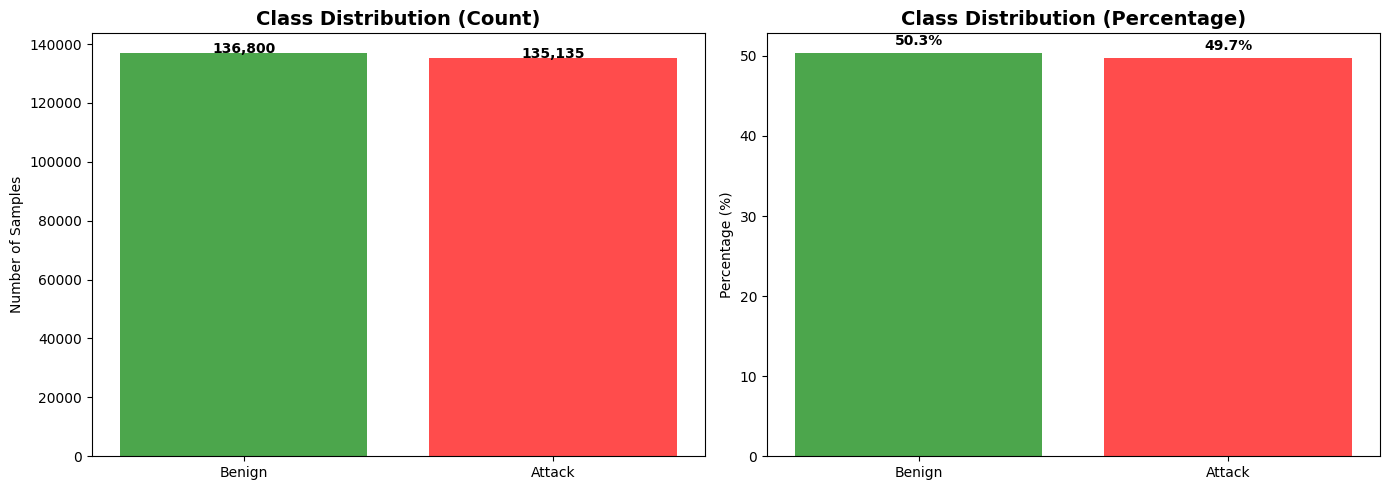

In [161]:
print("="*80)
print("CLASS DISTRIBUTION - TARGET VARIABLE")
print("="*80)

# Count classes
class_counts = df['is_attack'].value_counts().sort_index()
class_percent = df['is_attack'].value_counts(normalize=True).sort_index() * 100

print(f"\n📊 Distribution:")
print(f"   Benign (0): {class_counts[0]:,} samples ({class_percent[0]:.2f}%)")
print(f"   Attack (1): {class_counts[1]:,} samples ({class_percent[1]:.2f}%)")

# Calculate imbalance ratio
ratio = class_counts.max() / class_counts.min()
print(f"\n📈 Imbalance Ratio: {ratio:.2f}:1")

if ratio < 1.5:
    print("✅ Well Balanced - No special handling needed")
elif ratio < 3:
    print("⚠️  Slightly Imbalanced - Consider class weights")
else:
    print("🔴 Severely Imbalanced - Must use SMOTE or class weights!")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['Benign', 'Attack'], class_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Samples')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# Percentage plot
axes[1].bar(['Benign', 'Attack'], class_percent.values, color=['green', 'red'], alpha=0.7)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
for i, v in enumerate(class_percent.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# STEP 2 : DATA CLEANING
   WHAT: Fix problems and prepare data for ML<br>
   WHY:  Models need clean, consistent data<br>
   
   TASKS:<br>
   • Handle missing values (remove or impute)<br>
   • Remove duplicates<br>
   • Scale features (StandardScaler)<br>
   • Handle class imbalance (class weights)<br>
   • Train/test split (80/20, stratified)<br>
   
   OUTPUT: Clean dataset ready for modeling


## 2.0 Features 

### Purpose: Separate actual features from non-features Why: Labels are what we're trying to predict - including them would be cheating (data leakage). Identifiers like device names don't help predict attacks.

In [163]:
# Remove labels and identifiers
exclude = ['is_attack','label_full', 'label1', 'label2', 'label3', 'label4',
           'device_name', 'device_mac', 'timestamp', 'timestamp_start', 'timestamp_end']

feature_columns = [col for col in df.columns if col not in exclude]

print(f"Features: {len(feature_columns)}")

Features: 84


### Purpose: Filter to numeric data only Why: ML algorithms work with numbers, not text. Non-numeric columns (like IP addresses, MAC addresses) need special handling. What it does: Selects only columns with numeric data types (int, float)

In [164]:
# Keep only numeric features
numeric_features = df[feature_columns].select_dtypes(include=[np.number]).columns.tolist()

print(f"Numeric features: {len(numeric_features)}")

Numeric features: 71


## 2.1 Remove ZERO VARIANCE

### Purpose: Remove features that never change Why: If a feature has the same value for all samples (variance=0), it provides no information for distinguishing benign from attack. Example: if all samples have protocol='TCP', it can't help predict anything.

In [165]:
# Remove zero variance
variances = df[numeric_features].var()
features = variances[variances > 0].index.tolist()
print(f"After removing zero variance: {len(features)}")

After removing zero variance: 71


## 2.2 Remove correlated features

### Purpose: Remove redundant features Why: If two features are 95%+ correlated, they provide the same information. Keeping both wastes computation and can cause model to overweight that information. What it does: Calculates correlation between all feature pairs. If correlation > 0.95, drops one of them.

In [166]:
# Remove highly correlated (>0.95)
corr = df[features].corr().abs()
to_drop = set()

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if corr.iloc[i, j] > 0.95:
            to_drop.add(corr.columns[j])

features = [f for f in features if f not in to_drop]
print(f"Final features: {len(features)}")
print(features)


Final features: 51
['log_data-ranges_avg', 'log_data-ranges_std_deviation', 'log_data-types_count', 'log_interval-messages', 'log_messages_count', 'network_fragmentation-score', 'network_fragmented-packets', 'network_header-length_avg', 'network_header-length_std_deviation', 'network_interval-packets', 'network_ip-flags_avg', 'network_ip-flags_max', 'network_ip-flags_min', 'network_ip-flags_std_deviation', 'network_ip-length_avg', 'network_ip-length_max', 'network_ip-length_min', 'network_ip-length_std_deviation', 'network_ips_all_count', 'network_ips_src_count', 'network_mss_avg', 'network_mss_std_deviation', 'network_packet-size_min', 'network_packets_all_count', 'network_packets_src_count', 'network_payload-length_std_deviation', 'network_ports_all_count', 'network_ports_dst_count', 'network_protocols_all_count', 'network_protocols_dst_count', 'network_protocols_src_count', 'network_tcp-flags-ack_count', 'network_tcp-flags-fin_count', 'network_tcp-flags-syn_count', 'network_tcp-flag

## 2.3  Best features selection

In [169]:
X = df[features]        # numeric feature data
y = df['is_attack']     # target

# Train the model
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Show full ranking
print("Feature ranking:\n", feat_importances)


Feature ranking:
 network_packet-size_min                 0.143608
network_time-delta_min                  0.138964
network_packets_all_count               0.134632
network_ports_all_count                 0.079649
network_interval-packets                0.050872
network_ports_dst_count                 0.039454
network_packets_src_count               0.035168
network_time-delta_avg                  0.033157
network_time-delta_std_deviation        0.026306
network_ttl_avg                         0.025774
network_tcp-flags-ack_count             0.024722
network_time-delta_max                  0.023242
network_tcp-flags-syn_count             0.020270
network_window-size_min                 0.018948
network_protocols_dst_count             0.015574
network_ip-length_avg                   0.014194
network_window-size_std_deviation       0.013978
network_window-size_avg                 0.013203
network_ttl_max                         0.012996
network_ttl_min                         0.012901
ne

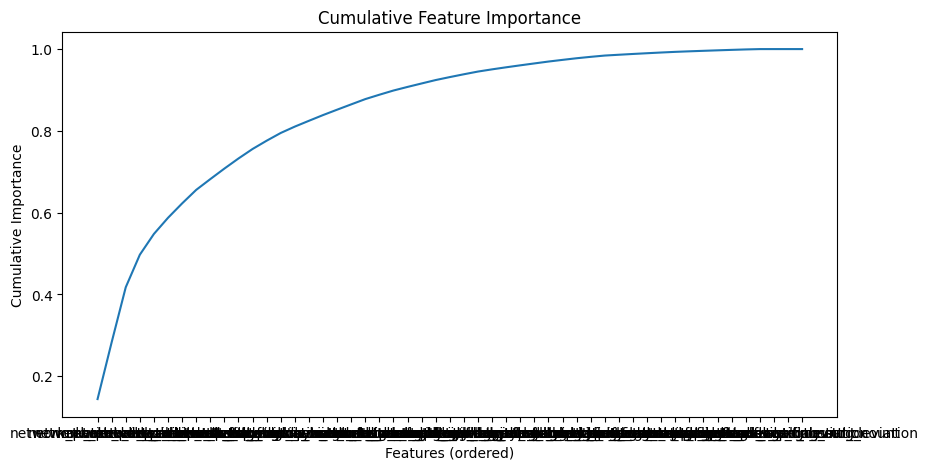

In [170]:
# Optional: cumulative importance
cumulative_importance = feat_importances.cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(cumulative_importance)
plt.ylabel('Cumulative Importance')
plt.xlabel('Features (ordered)')
plt.title('Cumulative Feature Importance')
plt.show()


In [188]:
# Keep features until 95% cumulative importance
final_features = cumulative_importance[cumulative_importance <= 0.95].index.tolist()

# Add domain-important features if they exist in the dataset
domain_critical = ['syn_ratio', 'protocol_diversity', 'hour_of_day']
for f in domain_critical:
    if f in df.columns and f not in final_features:
        final_features.append(f)

# Make sure all selected features exist in the dataframe
final_features = [f for f in final_features if f in df.columns]

# Create X with only the final features
X = df[final_features]
y = df['is_attack']

print("Final features to use:", final_features)
print("Shape of X:", X.shape)


Final features to use: ['network_packet-size_min', 'network_time-delta_min', 'network_packets_all_count', 'network_ports_all_count', 'network_interval-packets', 'network_ports_dst_count', 'network_packets_src_count', 'network_time-delta_avg', 'network_time-delta_std_deviation', 'network_ttl_avg', 'network_tcp-flags-ack_count', 'network_time-delta_max', 'network_tcp-flags-syn_count', 'network_window-size_min', 'network_protocols_dst_count', 'network_ip-length_avg', 'network_window-size_std_deviation', 'network_window-size_avg', 'network_ttl_max', 'network_ttl_min', 'network_mss_avg', 'network_ip-length_max', 'network_header-length_avg', 'network_tcp-flags_avg', 'network_ip-length_min', 'network_ttl_std_deviation', 'network_ips_all_count', 'network_window-size_max']
Shape of X: (271935, 28)


# STEP 4 : TRAINING

## BASELINE MODELS

### 🧠 Model 1: Logistic Regression 

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)


(217548, 28) (54387, 28)


In [190]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [191]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=5000)

# Train the model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

Accuracy: 0.8798
Precision: 0.9683
Recall: 0.7837
F1-Score: 0.8663


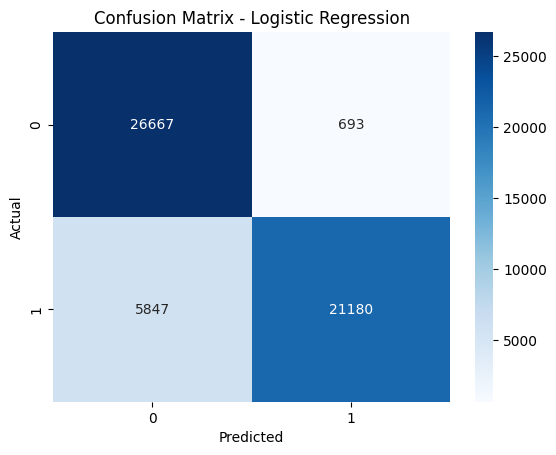

In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 🧠 Model 2: K-Nearest Neighbors (KNN)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

Accuracy: 0.9143
Precision: 0.9741
Recall: 0.8501
F1-Score: 0.9079


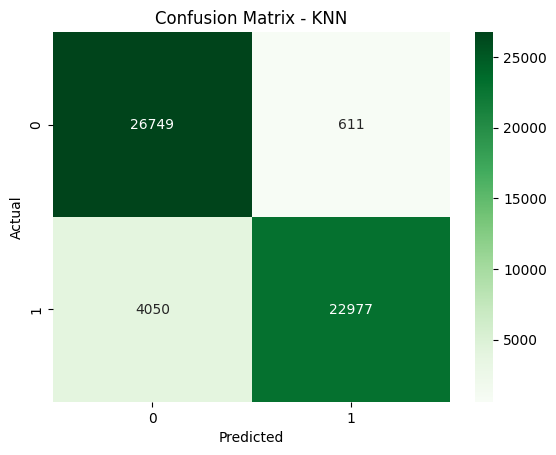

In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn, zero_division=0)
rec = recall_score(y_test, y_pred_knn, zero_division=0)
f1 = f1_score(y_test, y_pred_knn, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  Model 3: Decision Tree Classifier 

### Decision Trees make predictions by learning simple decision rules from features. They're:
- Easy to interpret and visualize
- Can capture non-linear patterns
- Don't require feature scaling 
- Can overfit if not controlled 

In [179]:
# Step 1: Import Required Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
# Step 2: Create and Train Decision Tree Model
# max_depth=10 limits tree depth to prevent overfitting
# random_state=42 ensures reproducibility

dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train_scaled, y_train)

print("✅ Decision Tree model trained successfully!")

✅ Decision Tree model trained successfully!


In [181]:
# Step 3: Make Predictions on Test Set
y_pred_dt = dt.predict(X_test_scaled)

print(f"✅ Predictions made on {len(y_pred_dt)} test samples")
# Step 4: Evaluate Model Performance
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt, zero_division=0)
rec = recall_score(y_test, y_pred_dt, zero_division=0)
f1 = f1_score(y_test, y_pred_dt, zero_division=0)

print("=" * 50)
print("DECISION TREE - PERFORMANCE METRICS")
print("=" * 50)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("=" * 50)

✅ Predictions made on 54387 test samples
DECISION TREE - PERFORMANCE METRICS
Accuracy:  0.9341
Precision: 0.9976
Recall:    0.8695
F1-Score:  0.9292


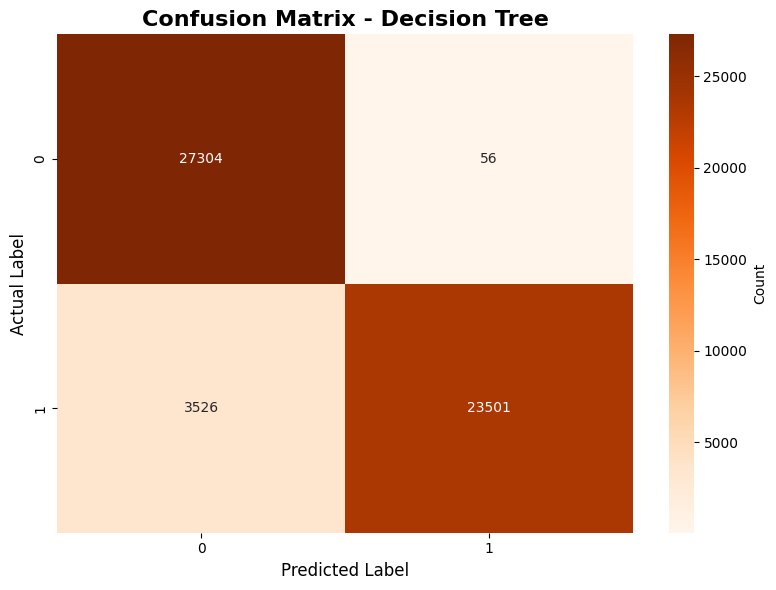


📊 Confusion Matrix Breakdown:
True Negatives (Normal correctly identified): 27304
False Positives (Normal flagged as Attack): 56
False Negatives (Attack missed): 3526
True Positives (Attack correctly identified): 23501


In [182]:
# Step 5: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Breakdown:")
print(f"True Negatives (Normal correctly identified): {cm[0][0]}")
print(f"False Positives (Normal flagged as Attack): {cm[0][1]}")
print(f"False Negatives (Attack missed): {cm[1][0]}")
print(f"True Positives (Attack correctly identified): {cm[1][1]}")

# STEP 2 : Intermediate Models

## Model 1 : Random Forest

1- Random Forest is an ensemble of Decision Trees. Key advantages: <br>
 - Reduces overfitting compared to a single Decision Tree
 - Captures non-linear patterns
 - Generally gives very strong performance on tabular data

In [183]:
# Step 1: Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [184]:
# Step 2: Create and Train Random Forest Model
rf = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=15,       # max depth of each tree
    random_state=42,    # reproducibility
    n_jobs=-1           # use all CPU cores for speed
)

rf.fit(X_train_scaled, y_train)

print("✅ Random Forest model trained successfully!")


✅ Random Forest model trained successfully!


In [185]:
# Step 3: Make Predictions
y_pred_rf = rf.predict(X_test_scaled)
print(f"✅ Predictions made on {len(y_pred_rf)} test samples")
# Step 4: Evaluate Model Performance
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf, zero_division=0)
rec = recall_score(y_test, y_pred_rf, zero_division=0)
f1 = f1_score(y_test, y_pred_rf, zero_division=0)

print("="*50)
print("RANDOM FOREST - PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("="*50)


✅ Predictions made on 54387 test samples
RANDOM FOREST - PERFORMANCE METRICS
Accuracy:  0.9361
Precision: 0.9956
Recall:    0.8752
F1-Score:  0.9315
